#Task A</b>

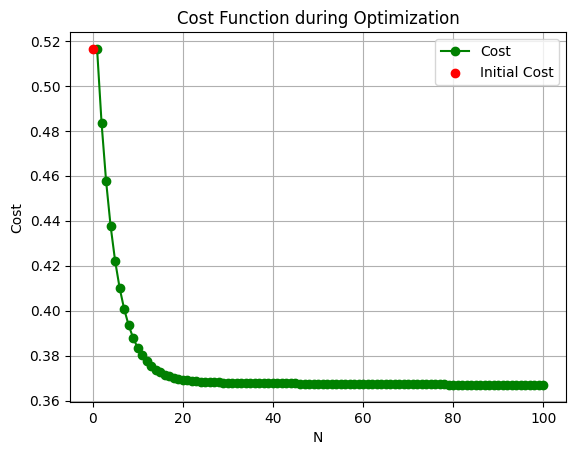

|   n |        J |    THETA0 |    THETA1 |
|-----|----------|-----------|-----------|
|   1 | 0.516437 | 0.0620665 | 0.0261711 |
|   2 | 0.483313 | 0.116829  | 0.0490399 |
|   3 | 0.457599 | 0.165156  | 0.0690008 |
|   4 | 0.437637 | 0.207813  | 0.0864016 |
|   5 | 0.422138 | 0.245474  | 0.101548  |
|   6 | 0.410103 | 0.278734  | 0.114711  |
|   7 | 0.400756 | 0.308116  | 0.126127  |
|   8 | 0.393496 | 0.334081  | 0.136005  |
|   9 | 0.387856 | 0.357035  | 0.144531  |
|  10 | 0.383472 | 0.377336  | 0.151866  |
|  11 | 0.380064 | 0.395299  | 0.158154  |
|  12 | 0.377413 | 0.411203  | 0.16352   |
|  13 | 0.37535  | 0.425291  | 0.168076  |
|  14 | 0.373743 | 0.437779  | 0.17192   |
|  15 | 0.372489 | 0.448857  | 0.175137  |
|  16 | 0.371511 | 0.458692  | 0.177803  |
|  17 | 0.370747 | 0.467432  | 0.179986  |
|  18 | 0.370148 | 0.475206  | 0.181743  |
|  19 | 0.369678 | 0.482129  | 0.183128  |
|  20 | 0.369307 | 0.488302  | 0.184185  |
|  21 | 0.369015 | 0.493813  | 0.184956  |
|  22 | 0.3

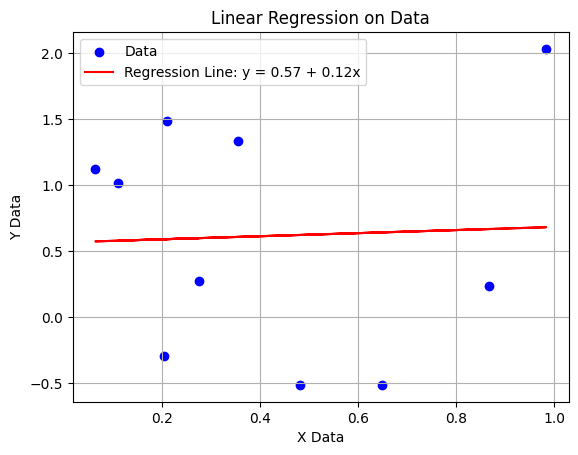

In [34]:
import numpy as np
import warnings
from tabulate import tabulate as tb
import matplotlib.pyplot as plt

#Definiton of hθ(x) (Hypothesis Function)
def hypothesis_func(theta, x):
    return theta[0] + theta[1] * x

#Definition of J(θ0,θ1) (Cost Function)
def cost_func(theta, x, y):
    m = len(x)
    sum = 0
    for i in range (m):
      sum += (hypothesis_func(theta, x[i]) - y[i])**2

    return (1/(2*m))*(sum)

#Definition of Gradient Descent to find the minimum possible value of J
def grad_descent(theta, x, y, iters, L_rate):
    data = []
    costs = []
    m = len(x)
    for i in range(iters):
        dtheta0 = 0
        dtheta1 = 0
        for j in range(m):
            dtheta0 += (hypothesis_func(theta, x[j]) - y[j])
            dtheta1 += (hypothesis_func(theta, x[j]) - y[j]) * x[j, 0]

        theta[0] -= L_rate * dtheta0
        theta[1] -= L_rate * dtheta1
        costs.append(cost_func(theta,x,y))
        data.append([i+1, cost_func(theta, x, y), theta[0], theta[1]])

    #(a)A plot of J(θ0,θ1) with initial point
    plt.plot(range(1, iters + 1), costs, marker='o', linestyle='-', color='g', label='Cost')
    plt.scatter(0, costs[0], color='red', label='Initial Cost', zorder=5)
    plt.xlabel('N')
    plt.ylabel('Cost')
    plt.title('Cost Function during Optimization')
    plt.legend()
    plt.grid(True)
    plt.show()

    #(b)Table of Gradient Descent over Iterations
    print(tb(data, headers=['n', 'J', 'THETA0', 'THETA1'], tablefmt="github"))

    #(c)Scatter Plot of Linear Regression
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, hypothesis_func(theta, x), label=f'Regression Line: y = {theta[0]:.2f} + {theta[1]:.2f}x', color='red')
    plt.xlabel('X Data')
    plt.ylabel('Y Data')
    plt.title('Linear Regression on Data')
    plt.legend()
    plt.grid(True)
    plt.show()
    return

x = np.random.rand(10, 1)
y = 2 * x + np.random.randn(10, 1)
theta = np.zeros(2)
L_rate = 0.01
iters = 100
warnings.filterwarnings("ignore", category=DeprecationWarning)
grad_descent(theta,x,y,iters,L_rate)